# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq  # library to read parquet files

In [139]:
# train data base

train = pd.read_csv('../train.csv')
train.rename(columns = {'State.Name':'State_Name'}, inplace = True)
train.head()

,ID,State_Name,Year,Age,Incidence
0,f8312a4,Alabama,1990,65-69,4685.284313
1,3effa36,Alabama,1990,70-74,4827.052043
2,1e8044b,Alabama,1990,75-79,4377.956914
3,d875d65,Alabama,1990,80-84,3822.732993
4,46e6695,Alabama,1990,85-89,3470.199503


In [43]:
test = pd.read_csv('../test.csv')
test.rename(columns = {'State.Name':'State_Name'}, inplace = True)
test.head()

,ID,State_Name,Year,Age
0,6c06615,Delaware,1990,65-69
1,e0cf76e,Delaware,1990,70-74
2,e9f95f0,Delaware,1990,75-79
3,5dffe44,Delaware,1990,80-84
4,9f9ea9b,Delaware,1990,85-89


In [46]:
# read parquet file and make it pandas dataframe

haps = pq.read_table('../supplementary_HAPS.parquet').to_pandas()
haps.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
haps.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-04,Arsenic (TSP) STP,0.0,0.0
1,Alabama,1980-01-16,Arsenic (TSP) STP,0.0,0.0
2,Alabama,1980-01-28,Arsenic (TSP) STP,0.0,0.0


In [47]:
# lead parquet file into pandas dataframe

lead = pq.read_table('../supplementary_LEAD.parquet').to_pandas()
lead.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
lead.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,0.04
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,0.26
2,Alabama,1980-01-28,Lead (TSP) STP,0.13,0.13


In [48]:
# nono parquete file into pandas dataframe

nono = pq.read_table('../supplementary_NONOxNOy.parquet').to_pandas()
nono.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
nono.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-01,Nitric oxide (NO),54.458333,275.0
1,Alabama,1980-01-02,Nitric oxide (NO),130.545455,279.0
2,Alabama,1980-01-03,Nitric oxide (NO),122.333333,421.0


In [49]:
#vocs parquet file into pandas dataframe

vocs = pq.read_table('../supplementary_VOCS.parquet').to_pandas()
vocs.rename(columns = {'State.Name':'State_Name','Date.Local':'Date_Local', 
                       'Parameter.Name':'Parameter_Name','Arithmetic.Mean':'Arithmetic_Mean',
                       'X1st.Max.Value':'X1st_Max_Value'}, inplace = True)
vocs.head(3)

,State_Name,Date_Local,Parameter_Name,Arithmetic_Mean,X1st_Max_Value
0,Alabama,1980-01-01,Total NMOC (non-methane organic compound),627.083333,2020.0
1,Alabama,1980-01-02,Total NMOC (non-methane organic compound),1240.909091,3360.0
2,Alabama,1980-01-03,Total NMOC (non-methane organic compound),2079.166667,5670.0


# EDA

In [50]:
# we can see the parquet files have more than 7 million observations, vocs have 26 million observatios
print(train.shape, haps.shape, lead.shape, nono.shape, vocs.shape)

(4500, 5) (9834368, 5) (866835, 5) (7987680, 5) (26601135, 5)


#### First we explore train

In [51]:
# we can see there are no missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4500 non-null   object 
 1   State_Name  4500 non-null   object 
 2   Year        4500 non-null   int64  
 3   Age         4500 non-null   object 
 4   Incidence   4500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 175.9+ KB


In [52]:
train.Age.value_counts()

65-69    750
70-74    750
75-79    750
80-84    750
85-89    750
90-94    750
Name: Age, dtype: int64

In [53]:
train['State_Name'].value_counts(dropna = False).head()

Alabama      180
Iowa         180
Texas        180
Tennessee    180
Oregon       180
Name: State_Name, dtype: int64

In [56]:
test['State_Name'].value_counts(dropna = False).head()

Delaware         180
Illinois         180
Wisconsin        180
West Virginia    180
Virginia         180
Name: State_Name, dtype: int64

In [57]:
# We can eliminate years from lead, haps, nono, vocs data bases.
# because we will not use

#train.Year.value_counts(dropna = False).sort_values()
#train.Year.min() #1990
#train.Year.max() #2019
#test.Year.min() #1990
test.Year.max() #2019

2019

In [58]:
train.Incidence.describe()

count    4500.000000
mean     4704.663094
std      1525.974789
min      2725.462720
25%      3448.309431
50%      3999.505948
75%      5862.682928
max      9200.199095
Name: Incidence, dtype: float64

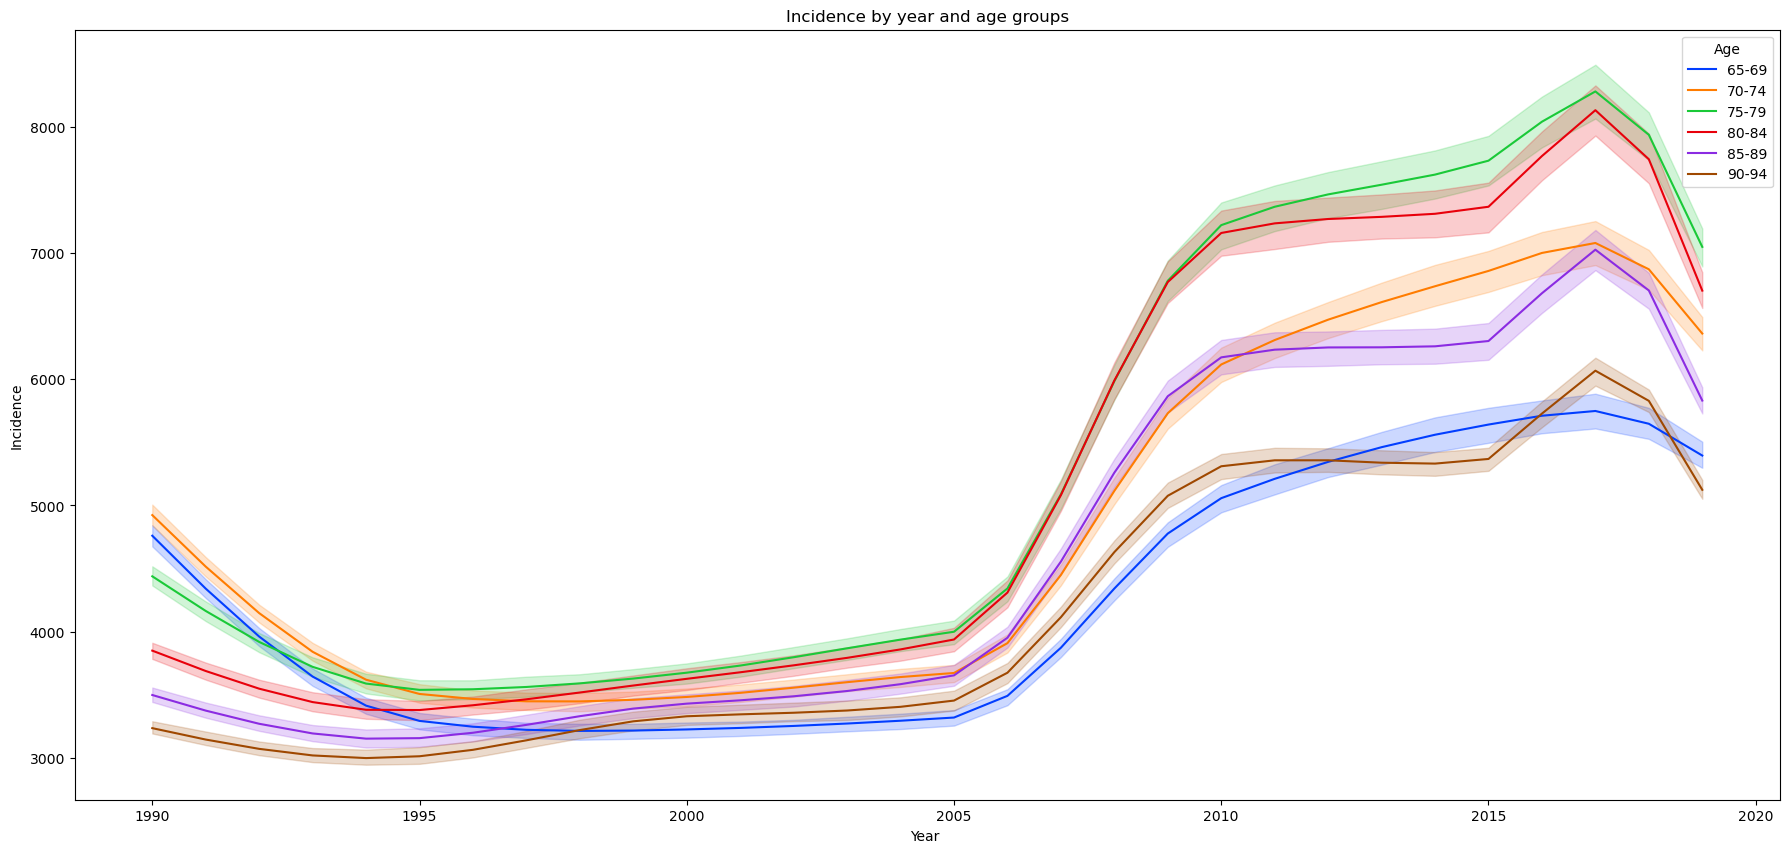

In [59]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(train, x='Year', y='Incidence', hue='Age', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Incidence by year and age groups');

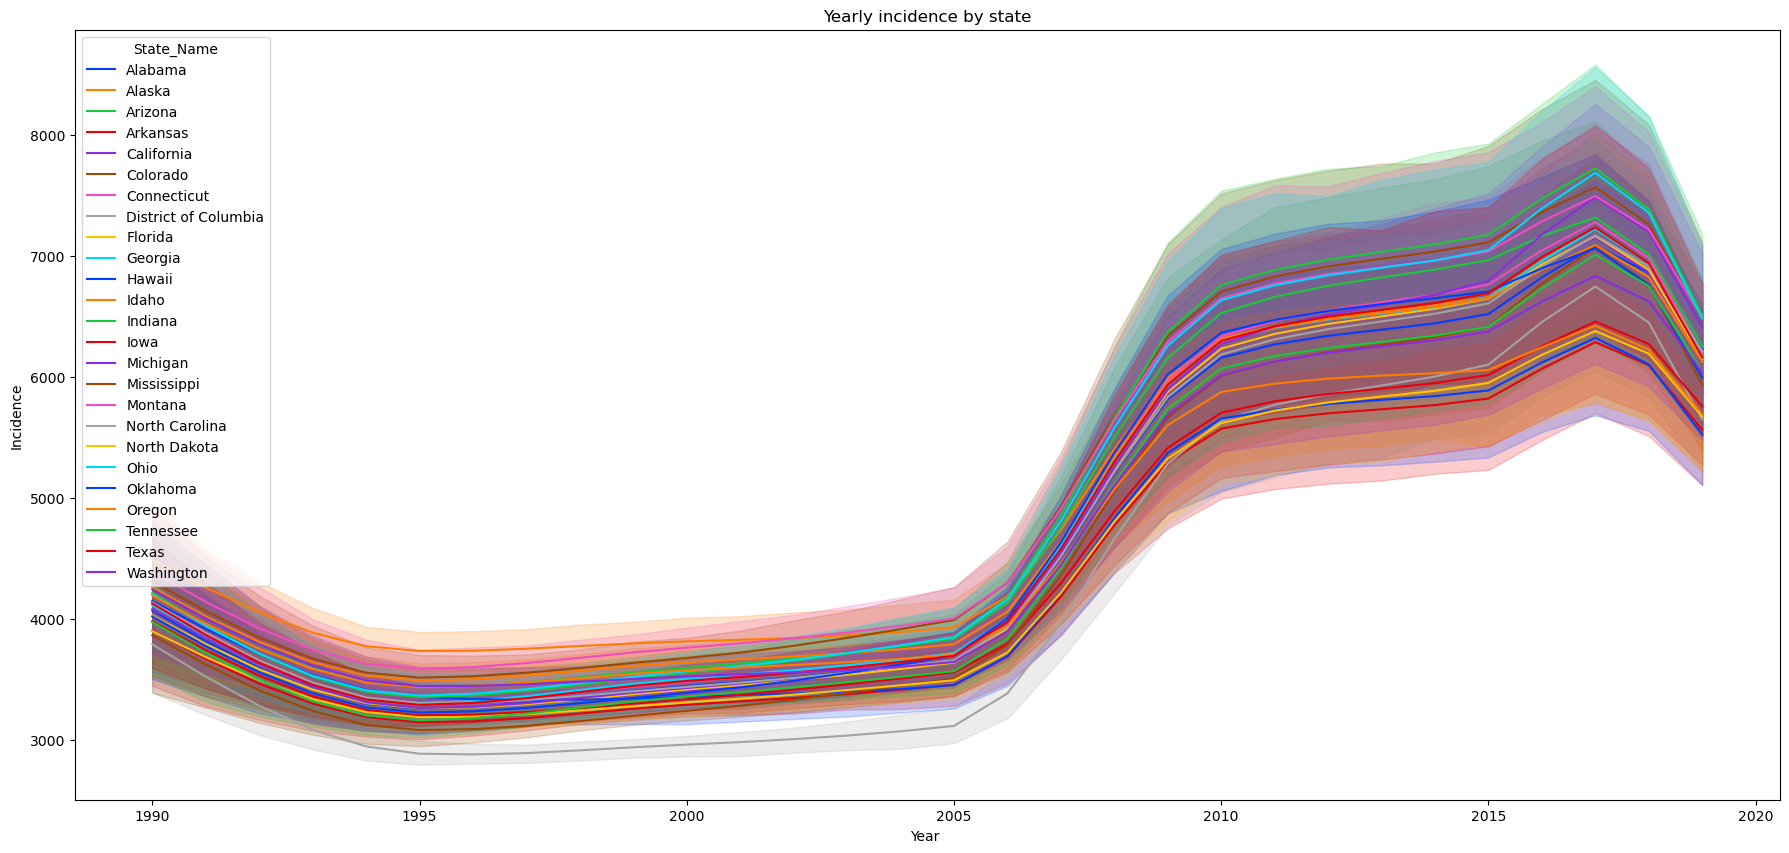

In [60]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(train, x='Year', y='Incidence', hue='State_Name', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Yearly incidence by state');

## Understand  dates:
- train: yearly info

In [61]:
# more than one observation per month, 12 months per year
lead['Date_Local'].head(8)

0    1980-01-04
1    1980-01-16
2    1980-01-28
3    1980-02-09
4    1980-02-21
5    1980-03-04
6    1980-03-16
7    1980-03-28
Name: Date_Local, dtype: object

In [62]:
lead['State_Name'].value_counts(dropna = False).head()

California        96327
Pennsylvania      86556
Missouri          83480
Texas             77701
South Carolina    48005
Name: State_Name, dtype: int64

In [19]:
lead.isnull().sum()

State.Name         0
Date.Local         0
Parameter.Name     0
Arithmetic.Mean    0
X1st.Max.Value     0
dtype: int64

In [20]:
# I am interested in agregating data BY STATE and keeping 
# - Global max value per year
# - Global max mean value per year
# - Global mean of value per year
# - Global mean of means per year
# Average of monthly averages by state and year

# I need to add month-year column
# I need to add year column

In [63]:
# WE have more than one parameter in each data base

lead['Parameter_Name'].value_counts(dropna = False)

Lead (TSP) STP          706949
Lead (TSP) LC           148507
Lead PM10 LC FRM/FEM     11379
Name: Parameter_Name, dtype: int64

In [65]:
haps['Parameter_Name'].value_counts(dropna = False).head(5)

Lead PM2.5 LC         712435
Nickel PM2.5 LC       712432
Manganese PM2.5 LC    712121
Chromium PM2.5 LC     710638
Arsenic PM2.5 LC      710485
Name: Parameter_Name, dtype: int64

In [66]:
# WE have different number of observations per day
lead['Date_Local'].value_counts(dropna = False)

1986-02-01    779
1985-05-01    777
1986-06-01    744
1983-03-01    688
1985-01-01    670
             ... 
2000-11-19      1
2000-11-13      1
2000-11-07      1
2000-11-03      1
1981-12-13      1
Name: Date_Local, Length: 14571, dtype: int64

In [67]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866835 entries, 0 to 866834
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State_Name       866835 non-null  object 
 1   Date_Local       866835 non-null  object 
 2   Parameter_Name   866835 non-null  object 
 3   Arithmetic_Mean  866835 non-null  float64
 4   X1st_Max_Value   866835 non-null  float64
dtypes: float64(2), object(3)
memory usage: 33.1+ MB


In [68]:
lead['Date_Local'] = pd.to_datetime(lead['Date_Local'])

In [69]:
lead['year_month'] = lead['Date_Local'].dt.strftime('%Y-%m')
lead['year'] = lead['Date_Local'].dt.strftime('%Y')

In [70]:
# changing year to integer to aggregate properly
lead['year'] = lead['year'].astype('int')

In [28]:
lead.shape

(866835, 7)

In [29]:
lead.head(2)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value,year_month,year
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,0.04,1980-01,1980
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,0.26,1980-01,1980


## LEAD
#### Aggregate by month-year (later by year)

In [145]:
# aggregate by month-year
lead_year_month = lead.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
lead_year_month.reset_index(inplace = True)
lead_year_month.head(2)

State_Name Parameter_Name year_month    year Arithmetic_Mean                \
                                          mean            mean    min    max   
0    Alabama  Lead (TSP) LC    2009-01  2009.0        0.271900  0.056  0.686   
1    Alabama  Lead (TSP) LC    2009-02  2009.0        0.619571  0.222  0.914   

  X1st_Max_Value                
            mean    min    max  
0       0.271900  0.056  0.686  
1       0.619571  0.222  0.914

In [146]:
# Changing the names of lead_year_month

# We use the header and subheader and join them with '_'

agg_col_names = lead_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

lead_year_month.columns = elements

lead_year_month.head(3)

,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,Lead (TSP) LC,2009-01,2009.0,0.271900,0.056,0.686,0.271900,0.056,0.686
1,Alabama,Lead (TSP) LC,2009-02,2009.0,0.619571,0.222,0.914,0.619571,0.222,0.914
2,Alabama,Lead (TSP) LC,2009-03,2009.0,0.985500,0.042,3.225,0.985500,0.042,3.225


#### Lead aggregate by year

In [147]:
# aggregate by year
lead_year = lead_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
lead_year.reset_index(inplace = True)

lead_year.head(3)

,State_Name_,Parameter_Name_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,Lead (TSP) LC,2009.0,0.438238,0.026,3.225,0.438238,0.026,3.225
1,Alabama,Lead (TSP) LC,2010.0,0.628359,0.009,2.651,0.628359,0.009,2.651
2,Alabama,Lead (TSP) LC,2011.0,0.619585,0.013,4.348,0.619585,0.013,4.348


In [148]:
# Creating pivot table to have per state and year the different parameters as columns

lead_trans = lead_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')
lead_trans.reset_index(inplace = True)
lead_trans.head(3)

State_Name_ year_mean Arithmetic_Mean_mean                 \
Parameter_Name_                              Lead (TSP) LC Lead (TSP) STP   
0                   Alabama    1980.0                  NaN       1.011834   
1                   Alabama    1981.0                  NaN       0.830934   
2                   Alabama    1982.0                  NaN       0.834853   

                                     Arithmetic_Mean_min                 \
Parameter_Name_ Lead PM10 LC FRM/FEM       Lead (TSP) LC Lead (TSP) STP   
0                                NaN                 NaN          0.020   
1                                NaN                 NaN          0.000   
2                                NaN                 NaN          0.016   

                                     Arithmetic_Mean_max                 \
Parameter_Name_ Lead PM10 LC FRM/FEM       Lead (TSP) LC Lead (TSP) STP   
0                                NaN                 NaN          11.08   
1                                NaN                 NaN          23.20   
2                                NaN                 NaN          18.58   

                                     X1st_Max_Value_mean                 \
Parameter_Name_ Lead PM10 LC FRM/FEM       Lead (TSP) LC Lead (TSP) STP   
0                                NaN                 NaN       1.011834   
1                                NaN                 NaN       0.830934   
2                                NaN                 NaN       0.834853   

                                     X1st_Max_Value_min                 \
Parameter_Name_ Lead PM10 LC FRM/FEM      Lead (TSP) LC Lead (TSP) STP   
0                                NaN                NaN          0.020   
1                                NaN                NaN          0.000   
2                                NaN                NaN          0.016   

                                     X1st_Max_Value_max                 \
Parameter_Name_ Lead PM10 LC FRM/FEM      Lead (TSP) LC Lead (TSP) STP   
0                                NaN                NaN          11.08   
1                                NaN                NaN          23.20   
2                                NaN                NaN          18.58   

                                      
Parameter_Name_ Lead PM10 LC FRM/FEM  
0                                NaN  
1                                NaN  
2                                NaN

In [149]:
# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = lead_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

lead_trans.columns = elements

lead_trans.head(3)

,State_Name__,year_mean_,Arithmetic_Mean_mean_Lead_(TSP)_LC,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_PM10_LC_FRM/FEM,Arithmetic_Mean_min_Lead_(TSP)_LC,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_PM10_LC_FRM/FEM,Arithmetic_Mean_max_Lead_(TSP)_LC,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_PM10_LC_FRM/FEM,X1st_Max_Value_mean_Lead_(TSP)_LC,X1st_Max_Value_mean_Lead_(TSP)_STP,X1st_Max_Value_mean_Lead_PM10_LC_FRM/FEM,X1st_Max_Value_min_Lead_(TSP)_LC,X1st_Max_Value_min_Lead_(TSP)_STP,X1st_Max_Value_min_Lead_PM10_LC_FRM/FEM,X1st_Max_Value_max_Lead_(TSP)_LC,X1st_Max_Value_max_Lead_(TSP)_STP,X1st_Max_Value_max_Lead_PM10_LC_FRM/FEM
0,Alabama,1980.0,NaN,1.011834,NaN,NaN,0.020,NaN,NaN,11.08,NaN,NaN,1.011834,NaN,NaN,0.020,NaN,NaN,11.08,NaN
1,Alabama,1981.0,NaN,0.830934,NaN,NaN,0.000,NaN,NaN,23.20,NaN,NaN,0.830934,NaN,NaN,0.000,NaN,NaN,23.20,NaN
2,Alabama,1982.0,NaN,0.834853,NaN,NaN,0.016,NaN,NaN,18.58,NaN,NaN,0.834853,NaN,NaN,0.016,NaN,NaN,18.58,NaN


#### Merge with train 

### **NOTE** here I will merge with test too, once we decide which variables to keep

In [178]:
# lead shape: (1650, 9)

train_complete = train.merge(lead_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.head()

,ID,State_Name,Year,Age,Incidence,Arithmetic_Mean_mean_Lead_(TSP)_LC,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_PM10_LC_FRM/FEM,Arithmetic_Mean_min_Lead_(TSP)_LC,Arithmetic_Mean_min_Lead_(TSP)_STP,...,Arithmetic_Mean_max_Lead_PM10_LC_FRM/FEM,X1st_Max_Value_mean_Lead_(TSP)_LC,X1st_Max_Value_mean_Lead_(TSP)_STP,X1st_Max_Value_mean_Lead_PM10_LC_FRM/FEM,X1st_Max_Value_min_Lead_(TSP)_LC,X1st_Max_Value_min_Lead_(TSP)_STP,X1st_Max_Value_min_Lead_PM10_LC_FRM/FEM,X1st_Max_Value_max_Lead_(TSP)_LC,X1st_Max_Value_max_Lead_(TSP)_STP,X1st_Max_Value_max_Lead_PM10_LC_FRM/FEM
0,f8312a4,Alabama,1990,65-69,4685.284313,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,0.664543,NaN,NaN,0.0,NaN,NaN,7.96,NaN
1,3effa36,Alabama,1990,70-74,4827.052043,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,0.664543,NaN,NaN,0.0,NaN,NaN,7.96,NaN
2,1e8044b,Alabama,1990,75-79,4377.956914,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,0.664543,NaN,NaN,0.0,NaN,NaN,7.96,NaN
3,d875d65,Alabama,1990,80-84,3822.732993,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,0.664543,NaN,NaN,0.0,NaN,NaN,7.96,NaN
4,46e6695,Alabama,1990,85-89,3470.199503,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,0.664543,NaN,NaN,0.0,NaN,NaN,7.96,NaN


# Aggregation of haps and merge with train

In [128]:
# Creation of date variables for aggregation

haps['Date_Local'] = pd.to_datetime(haps['Date_Local'])

haps['year_month'] = haps['Date_Local'].dt.strftime('%Y-%m')
haps['year'] = haps['Date_Local'].dt.strftime('%Y')

# changing year to integer to aggregate properly
haps['year'] = haps['year'].astype('int')

In [152]:
# aggregate by month-year
haps_year_month = haps.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
haps_year_month.reset_index(inplace = True)

# Changing the names of lead_year_month
# We use the header and subheader and join them with '_'

agg_col_names = haps_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

haps_year_month.columns = elements

haps_year_month.head(3)


,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,"1,1,2,2-Tetrachloroethane",1987-09,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,"1,1,2,2-Tetrachloroethane",1987-10,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,"1,1,2,2-Tetrachloroethane",1987-11,1987.0,0.0,0.0,0.0,0.0,0.0,0.0


In [153]:
# aggregate by year
haps_year = haps_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
haps_year.reset_index(inplace = True)

haps_year.head(3)

,State_Name_,Parameter_Name_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,"1,1,2,2-Tetrachloroethane",1987.0,0.000,0.0,0.00,0.000,0.0,0.00
1,Alabama,"1,1,2,2-Tetrachloroethane",1988.0,0.016,0.0,0.16,0.016,0.0,0.16
2,Alabama,"1,1,2,2-Tetrachloroethane",1995.0,0.000,0.0,0.00,0.000,0.0,0.00


In [154]:
# Creating pivot table to have per state and year the different parameters as columns
haps_trans = haps_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')

haps_trans.reset_index(inplace = True)
# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = haps_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

haps_trans.columns = elements

haps_trans.head(3)

,State_Name__,year_mean_,"Arithmetic_Mean_mean_1,1,2,2-Tetrachloroethane","Arithmetic_Mean_mean_1,2-Dichloropropane","Arithmetic_Mean_mean_1,3-Butadiene",Arithmetic_Mean_mean_Acetaldehyde,Arithmetic_Mean_mean_Acrolein_-_Unverified,Arithmetic_Mean_mean_Acrolein_-_Verified,Arithmetic_Mean_mean_Arsenic_(TSP)_STP,Arithmetic_Mean_mean_Arsenic_PM10_STP,...,X1st_Max_Value_max_Manganese_PM2.5_LC,X1st_Max_Value_max_Mercury_PM10_STP,X1st_Max_Value_max_Nickel_(TSP)_STP,X1st_Max_Value_max_Nickel_PM10_STP,X1st_Max_Value_max_Nickel_PM2.5_LC,X1st_Max_Value_max_Tetrachloroethylene,X1st_Max_Value_max_Trichloroethylene,X1st_Max_Value_max_Vinyl_chloride,"X1st_Max_Value_max_cis-1,3-Dichloropropene","X1st_Max_Value_max_trans-1,3-Dichloropropene"
0,Alabama,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002262,NaN,...,NaN,NaN,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1982.0,NaN,NaN,NaN,NaN,NaN,NaN,0.001051,NaN,...,NaN,NaN,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# Merge with train_complete

train_complete = train_complete.merge(haps_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.shape

(4500, 269)

## Nono data base: 
#### date variables creation, data aggregation, data merge with train_complete

In [133]:
# Creation of date variables for aggregation

nono['Date_Local'] = pd.to_datetime(nono['Date_Local'])

nono['year_month'] = nono['Date_Local'].dt.strftime('%Y-%m')
nono['year'] = nono['Date_Local'].dt.strftime('%Y')

# changing year to integer to aggregate properly
nono['year'] = nono['year'].astype('int')

In [156]:
# aggregate by month-year
nono_year_month = nono.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
nono_year_month.reset_index(inplace = True)

# Changing the names of lead_year_month
# We use the header and subheader and join them with '_'

agg_col_names = nono_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

nono_year_month.columns = elements

nono_year_month.head(3)


,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,Nitric oxide (NO),1980-01,1980.0,34.377530,3.142857,160.166667,132.258065,4.0,500.0
1,Alabama,Nitric oxide (NO),1980-02,1980.0,33.949811,4.041667,149.208333,155.357143,9.0,500.0
2,Alabama,Nitric oxide (NO),1980-03,1980.0,5.617064,2.125000,17.291667,18.523810,4.0,71.0


In [160]:
# aggregate by year
nono_year = nono_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
nono_year.reset_index(inplace = True)


# Creating pivot table to have per state and year the different parameters as columns
nono_trans = nono_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')
nono_trans.reset_index(inplace = True)

# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = nono_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

nono_trans.columns = elements

nono_trans.head(3)

,State_Name__,year_mean_,Arithmetic_Mean_mean_Nitric_oxide_(NO),Arithmetic_Mean_mean_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_mean_Reactive_oxides_of_nitrogen_(NOy),Arithmetic_Mean_min_Nitric_oxide_(NO),Arithmetic_Mean_min_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_min_Reactive_oxides_of_nitrogen_(NOy),Arithmetic_Mean_max_Nitric_oxide_(NO),Arithmetic_Mean_max_Oxides_of_nitrogen_(NOx),Arithmetic_Mean_max_Reactive_oxides_of_nitrogen_(NOy),X1st_Max_Value_mean_Nitric_oxide_(NO),X1st_Max_Value_mean_Oxides_of_nitrogen_(NOx),X1st_Max_Value_mean_Reactive_oxides_of_nitrogen_(NOy),X1st_Max_Value_min_Nitric_oxide_(NO),X1st_Max_Value_min_Oxides_of_nitrogen_(NOx),X1st_Max_Value_min_Reactive_oxides_of_nitrogen_(NOy),X1st_Max_Value_max_Nitric_oxide_(NO),X1st_Max_Value_max_Oxides_of_nitrogen_(NOx),X1st_Max_Value_max_Reactive_oxides_of_nitrogen_(NOy)
0,Alabama,1980.0,24.815430,46.143641,NaN,2.000000,7.00,NaN,254.625000,304.583333,NaN,95.798833,138.105640,NaN,3.0,9.0,NaN,500.0,500.0,NaN
1,Alabama,1981.0,26.343427,NaN,NaN,1.291667,NaN,NaN,152.166667,NaN,NaN,101.482790,NaN,NaN,3.0,NaN,NaN,500.0,NaN,NaN
2,Alabama,1983.0,38.853097,58.547496,NaN,4.458333,8.25,NaN,286.250000,324.500000,NaN,148.251536,181.888249,NaN,6.0,13.0,NaN,500.0,500.0,NaN


In [180]:
# Merge with train_complete

train_complete = train_complete.merge(nono_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.shape

(4500, 287)

## Vocs data aggregation and merge

In [163]:
# Creation of date variables for aggregation

vocs['Date_Local'] = pd.to_datetime(vocs['Date_Local'])

vocs['year_month'] = vocs['Date_Local'].dt.strftime('%Y-%m')
vocs['year'] = vocs['Date_Local'].dt.strftime('%Y')

# changing year to integer to aggregate properly
vocs['year'] = vocs['year'].astype('int')

In [168]:
# aggregate by month-year
vocs_year_month = vocs.groupby(['State_Name','Parameter_Name','year_month']).agg({'year':'mean', 'Arithmetic_Mean':['mean', 'min' ,'max'], 'X1st_Max_Value':['mean', 'min','max']})
vocs_year_month.reset_index(inplace = True)

# Changing the names of lead_year_month
# We use the header and subheader and join them with '_'

agg_col_names = vocs_year_month.columns

elements = []

for name in agg_col_names:
    elements.append("_".join(list(name)))
    

vocs_year_month.columns = elements

vocs_year_month.head(3)


,State_Name_,Parameter_Name_,year_month_,year_mean,Arithmetic_Mean_mean,Arithmetic_Mean_min,Arithmetic_Mean_max,X1st_Max_Value_mean,X1st_Max_Value_min,X1st_Max_Value_max
0,Alabama,"1,1,2,2-Tetrachloroethane",1987-09,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,"1,1,2,2-Tetrachloroethane",1987-10,1987.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,"1,1,2,2-Tetrachloroethane",1987-11,1987.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
# aggregate by year
vocs_year = vocs_year_month.groupby(['State_Name_','Parameter_Name_','year_mean']).agg({'Arithmetic_Mean_mean':'mean', 
                                                                                 'Arithmetic_Mean_min': 'min',
                                                                                 'Arithmetic_Mean_max': 'max', 
                                                                                 'X1st_Max_Value_mean': 'mean', 
                                                                                 'X1st_Max_Value_min':'min', 
                                                                                 'X1st_Max_Value_max': 'max'})
vocs_year.reset_index(inplace = True)


# Creating pivot table to have per state and year the different parameters as columns
vocs_trans = vocs_year.pivot(index = ['State_Name_', 'year_mean'], columns='Parameter_Name_')
vocs_trans.reset_index(inplace = True)

# Changing the names of the transposed table: lead_trans

# We use the header and subheader and join them with '_'
# Additionally spaces are removed and substituted with "_" too

agg_col_names = vocs_trans.columns

elements = []

for name in agg_col_names:
    elements.append(("_".join(list(name))).replace(" ","_"))
    

vocs_trans.columns = elements

vocs_trans.head(3)

,State_Name__,year_mean_,"Arithmetic_Mean_mean_1,1,2,2-Tetrachloroethane","Arithmetic_Mean_mean_1,1,2-Trichloro-1,2,2-trifluoroethane","Arithmetic_Mean_mean_1,1,2-Trichloroethane","Arithmetic_Mean_mean_1,1-Dichloroethane","Arithmetic_Mean_mean_1,1-Dichloroethylene","Arithmetic_Mean_mean_1,2,3-Trimethylbenzene","Arithmetic_Mean_mean_1,2,4-Trichlorobenzene","Arithmetic_Mean_mean_1,2,4-Trimethylbenzene",...,X1st_Max_Value_max_o-Ethyltoluene,X1st_Max_Value_max_o-Xylene,X1st_Max_Value_max_p-Diethylbenzene,X1st_Max_Value_max_p-Ethyltoluene,X1st_Max_Value_max_tert-Butyl_ethyl_ether,X1st_Max_Value_max_tert-butyl_alcohol,"X1st_Max_Value_max_trans-1,2-Dichloroethylene","X1st_Max_Value_max_trans-1,3-Dichloropropene",X1st_Max_Value_max_trans-2-Butene,X1st_Max_Value_max_trans-2-Pentene
0,Alabama,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Merge with train_complete

train_complete = train_complete.merge(vocs_trans, how='left', left_on=['State_Name','Year'], right_on=['State_Name__','year_mean_'] )
train_complete.drop(columns=['State_Name__', 'year_mean_'], inplace = True)
train_complete.shape

(4500, 1007)

In [210]:
train_complete.head(10)

,ID,State_Name,Year,Age,Incidence,Arithmetic_Mean_mean_Lead_(TSP)_LC,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_PM10_LC_FRM/FEM,Arithmetic_Mean_min_Lead_(TSP)_LC,Arithmetic_Mean_min_Lead_(TSP)_STP,...,X1st_Max_Value_max_o-Ethyltoluene,X1st_Max_Value_max_o-Xylene,X1st_Max_Value_max_p-Diethylbenzene,X1st_Max_Value_max_p-Ethyltoluene,X1st_Max_Value_max_tert-Butyl_ethyl_ether,X1st_Max_Value_max_tert-butyl_alcohol,"X1st_Max_Value_max_trans-1,2-Dichloroethylene","X1st_Max_Value_max_trans-1,3-Dichloropropene_y",X1st_Max_Value_max_trans-2-Butene,X1st_Max_Value_max_trans-2-Pentene
0,f8312a4,Alabama,1990,65-69,4685.284313,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3effa36,Alabama,1990,70-74,4827.052043,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1e8044b,Alabama,1990,75-79,4377.956914,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d875d65,Alabama,1990,80-84,3822.732993,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46e6695,Alabama,1990,85-89,3470.199503,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ad91736,Alabama,1990,90-94,3218.937439,NaN,0.664543,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9395145,Alabama,1991,65-69,4281.308512,NaN,0.582847,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,a268d7c,Alabama,1991,70-74,4426.406522,NaN,0.582847,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6eea820,Alabama,1991,75-79,4091.996748,NaN,0.582847,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,c2326e0,Alabama,1991,80-84,3643.423473,NaN,0.582847,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
train_complete.isnull().mean().sort_values()[450:500]

X1st_Max_Value_mean_Reactive_oxides_of_nitrogen_(NOy)     0.612000
X1st_Max_Value_max_Reactive_oxides_of_nitrogen_(NOy)      0.612000
Arithmetic_Mean_max_Reactive_oxides_of_nitrogen_(NOy)     0.612000
Arithmetic_Mean_min_Reactive_oxides_of_nitrogen_(NOy)     0.612000
Arithmetic_Mean_mean_Reactive_oxides_of_nitrogen_(NOy)    0.612000
X1st_Max_Value_mean_n-Pentane                             0.620000
X1st_Max_Value_max_n-Pentane                              0.620000
Arithmetic_Mean_max_n-Pentane                             0.620000
X1st_Max_Value_min_n-Pentane                              0.620000
Arithmetic_Mean_mean_n-Pentane                            0.620000
Arithmetic_Mean_min_n-Pentane                             0.620000
Arithmetic_Mean_mean_Bromoform                            0.622667
Arithmetic_Mean_min_Bromoform                             0.622667
X1st_Max_Value_max_Bromoform                              0.622667
X1st_Max_Value_min_Bromoform                              0.62

In [209]:
print(train.shape, lead_year.shape, train_complete.shape)

(4500, 5) (1650, 9) (4500, 1007)


In [208]:
train.Year.max() #1990 #2019

Index(['ID', 'State_Name', 'Year', 'Age', 'Incidence',
       'Arithmetic_Mean_mean_Lead_(TSP)_LC',
       'Arithmetic_Mean_mean_Lead_(TSP)_STP',
       'Arithmetic_Mean_mean_Lead_PM10_LC_FRM/FEM',
       'Arithmetic_Mean_min_Lead_(TSP)_LC',
       'Arithmetic_Mean_min_Lead_(TSP)_STP',
       ...
       'X1st_Max_Value_max_o-Ethyltoluene', 'X1st_Max_Value_max_o-Xylene',
       'X1st_Max_Value_max_p-Diethylbenzene',
       'X1st_Max_Value_max_p-Ethyltoluene',
       'X1st_Max_Value_max_tert-Butyl_ethyl_ether',
       'X1st_Max_Value_max_tert-butyl_alcohol',
       'X1st_Max_Value_max_trans-1,2-Dichloroethylene',
       'X1st_Max_Value_max_trans-1,3-Dichloropropene_y',
       'X1st_Max_Value_max_trans-2-Butene',
       'X1st_Max_Value_max_trans-2-Pentene'],
      dtype='object', length=1007)

#  To do:


- Understand definition of incidence (is it comparable accross States? like incidence per 100,000 persons would be?: 

    "Incidence - This is the target variable representing the incidence rate of chronic respiratory diseases in the given age group. This means how many new cases there are in a year divided by how many people there are in the middle of the year."

- Check how to get **rolling mean**

1. From element-data before merging
    - transform previous into columns ---> to have lagged columns
-  

# Notes

- we can't eliminate states because there are different states in train and test set

In [44]:
# len(lead.groupby('State.Name')['Date.Local'].count())
lead.groupby('State.Name')['Date.Local'].min()  # 1980-01-01  min

State.Name
Alabama                 1980-01-01
Alaska                  1980-01-04
Arizona                 1980-01-04
Arkansas                1981-01-10
California              1980-01-01
Colorado                1980-01-01
Connecticut             1980-01-04
Delaware                1980-01-04
District of Columbia    1981-07-09
Florida                 1980-01-04
Georgia                 1980-01-04
Hawaii                  1980-01-04
Idaho                   1980-01-01
Illinois                1980-01-01
Indiana                 1980-01-04
Iowa                    1980-01-04
Kansas                  1980-01-04
Kentucky                1980-01-01
Louisiana               1980-01-04
Maine                   1980-01-04
Maryland                1980-01-01
Massachusetts           1980-01-04
Michigan                1980-01-01
Minnesota               1980-01-04
Mississippi             1980-05-27
Missouri                1982-01-05
Montana                 1980-01-01
Nebraska                1980-01-04
Nevada   

In [35]:
lead.columns

Index(['State.Name', 'Date.Local', 'Parameter.Name', 'Arithmetic.Mean',
       'X1st.Max.Value'],
      dtype='object')